<a href="https://colab.research.google.com/github/PX2145-2025/week-2-b-AshfieldFred/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from numpy import array,sqrt,pi,sin
from numpy.linalg import inv
from scipy import integrate
from pylab import *

Text(0, 0.5, 'Amplitude (m)')

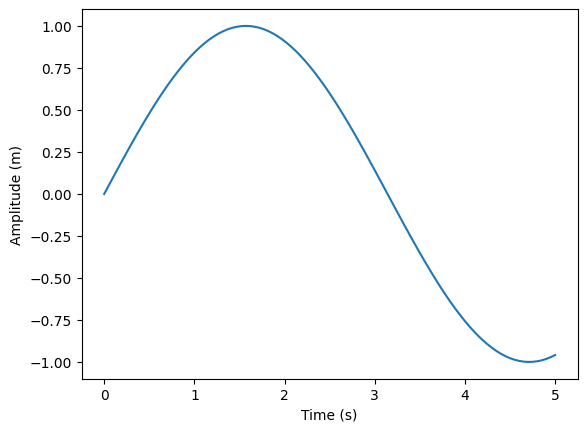

In [68]:
#Question 1
def func1(time,amplitude,frequency,phase):
  return amplitude*sin(frequency*time+phase)
time=linspace(0,5,100)

plot(time,func1(time,amplitude=1,frequency=1,phase=0))
xlabel('Time (s)')
ylabel('Amplitude (m)')

# Question 2
### Start with Kepler's 3rd law:
> $T^2=\frac{4\pi^2}{GM}*r^3$
#### where T is the orbital period of the satellite, G is the gravitational constant, M is the mass of the Earth and r is the distance to the centre of the Earth.
### Since r is the combination of the height, h, of the satellite and the radius of the Earth. It can be split into:
>$T^2=\frac{4\pi^2}{GM}*(R+h)^3$
#### Where R is the radius of the Earth and h is the height of the satellite above the surface of the Earth.
### Next, divide the left hand side by the fraction:
>$\frac{GMT^2}{4\pi^2}=(R+h)^3$
### Take the cube root of both sides:
>$(\frac{GMT^2}{4\pi^2})^{1/3}=R+h$
### Finally, taking R from both sides gives the final equation for the height, h, of a satellite above the earth's surface:
>$h=(\frac{GMT^2}{4\pi^2})^{1/3}-R$

In [70]:
#Question 2
G = 6.63e-11
M = 5.97e24
R = 6370e3

def h(T):
  return ((G * M * T**2) / (4 * pi**2))**(1/3) - R

T_input = float(input('Enter orbital period T in seconds: '))
height = h(T_input)
print(f'The height of a satellite with an orbital period of {T_input} seconds is {height/1000} km')


Enter orbital period T in seconds: 2700
The height of a satellite with an orbital period of 2700.0 seconds is -2188.9513876834526 km


In [64]:
%%writefile Linefitting.py
#Question 3

def linfit(x,y):
  n=len(x)
  D = sum(x**2) - 1./n * sum(x)**2
  x_bar = mean(x)
  p_coeff, residuals, _, _, _ = polyfit(x, y, 1, full=True)
  dm = sqrt(1./(n-2)*residuals/D)
  dc = sqrt(1./(n-2)*(D/n + x_bar**2)*residuals/D)
  return poly1d(p_coeff), dm, dc


Overwriting Linefitting.py


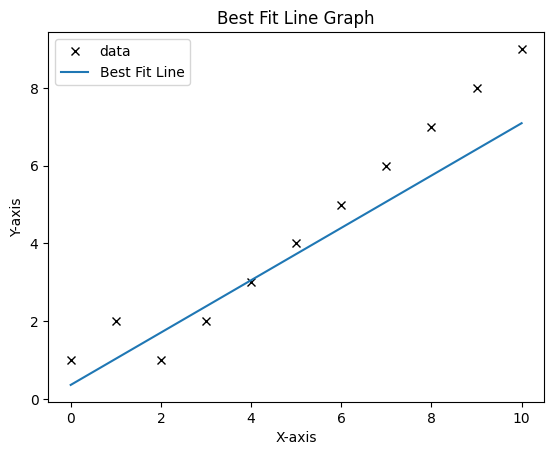

In [67]:
import Linefitting as LF
x=array([0,1,2,3,4,5,6,7,8,9,10])
y=array([1,2,1,2,3,4,5,6,7,8,9])
plot(x,y,'kx',label='data')
x_plot=linspace(0,10,100)
plot(x_plot,p(x_plot),label='Best Fit Line')
xlabel('X-axis')
ylabel('Y-axis')
title('Best Fit Line Graph')
legend()
show()